# Operations

**The dot product of two vectors is a scalar value that is the product of the magnitudes of the two vectors and the cosine of the angle between them**:

> $\mathbf{A} \cdot \mathbf{B} = |\mathbf{A}| |\mathbf{B}| \cos(\theta)$


**The angle $Q$ between two vectors A and B can be calculated using their dot product and magnitudes**:

> $\cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{A}| |\mathbf{B}|}$

> $\theta = \cos^{-1}\left( \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{A}| |\mathbf{B}|} \right)$


**The cross product of two vectors results in a third vector that is perpendicular to both of the original vectors. It is significant in physics, particularly in torque and rotational dynamics calculations**:

> $\mathbf{A} \times \mathbf{B} = |\mathbf{A}| |\mathbf{B}| \sin(\theta) \, \mathbf{n}$ , where `n` is the unit vector perpendicular to both A and B.

**The sine of the angle $θ$ between vectors A and B can be found using the formula**:

> $\sin(\theta) = \frac{|\mathbf{A} \times \mathbf{B}|}{|\mathbf{A}| |\mathbf{B}|}$




# General Approaches

## Util-Modules

In [2]:
from math import sqrt,pi,acos,degrees
from matplotlib.patches import Polygon,FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D,proj3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.collections import PathCollection
import matplotlib as mtb,matplotlib.pyplot as plt,os
import numpy as np

## Util-Class

In [3]:
class CLASSINIT:
  pass
class PROCESS:
  pass
class RESULT:
  pass
class OPERATIONS:
  pass
class DOCUMENTATION:
  pass
class NULL:
  pass
class ERROR:
  pass

# Process Parameters and Requirements

## Definition

In [4]:
class COLORS:
  BLUE = "C0"
  BLACK = "k"
  RED = "C3"
  GREEN = "C2"
  PURPLE = "C4"
  ORANGE = "C2"
  GRAY = "gray"

In [5]:
class FancyArrow3D(FancyArrowPatch):
    def __init__(self,xs,ys,zs,*args,**kwargs)->CLASSINIT:
        FancyArrowPatch.__init__(self,(0,0),(0,0),*args,**kwargs)
        self._verts3d = xs,ys,zs
    def do_3d_projection(self,renderer:None=None)->PROCESS:
        xs3d,ys3d,zs3d = self._verts3d
        xs,ys,zs = proj3d.proj_transform(xs3d,ys3d,zs3d,self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)

In [6]:
class Polygon3D():
  def __init__(self,*vertices,color:str=COLORS.BLUE)->CLASSINIT:
    self.vertices = vertices
    self.color = color
  def __str__(self)->str:
    return "Polygon Class - Sub(Script)"
  def __call__(self)->NULL|None:
    return None
  def __getstate__(self)->ERROR:
    raise NotImplementedError(NotImplemented)

In [7]:
class Points3D():
  def __init__(self,*vectors,color:str=COLORS.BLACK)->CLASSINIT:
    self.vectors = list(vectors)
    self.color = color
  def __str__(self)->str:
    return "Points Class - Sub(Script)"
  def __call__(self)->NULL|None:
    return None
  def __getstate__(self)->ERROR:
    raise NotImplementedError(NotImplemented)

In [8]:
class Arrow3D():
  def __init__(self,tip:tuple,tail:tuple=(0,0,0),color:str=COLORS.RED)->CLASSINIT:
    self.tip = tip
    self.tail = tail
    self.color = color
  def __str__(self)->str:
    return "Arrow Class - Sub(Script)"
  def __call__(self)->NULL|None:
    return None
  def __getstate__(self)->ERROR:
    raise NotImplementedError(NotImplemented)

In [9]:
class Segment3D():
  def __init__(self,startPoint:tuple,endPoint:tuple,color:str=COLORS.BLUE,linestyle:str="solid")->CLASSINIT:
    self.startPoint = startPoint
    self.endPoint = endPoint
    self.color = color
    self.linestyle = linestyle
  def __str__(self)->str:
    return "Segment Class - Sub(Script)"
  def __call__(self)->NULL|None:
    return None
  def __getstate__(self)->ERROR:
    raise NotImplementedError(NotImplemented)

In [10]:
class Box3D():
  def __init__(self,*vector)->CLASSINIT:
    self.vector = vector
  def __str__(self)->str:
    return "Box Class - Sub(Script)"
  def __call__(self)->NULL|None:
    return None
  def __getstate__(self)->ERROR:
    raise NotImplementedError(NotImplemented)

## Functions

In [11]:
def ExtractVector(objects:list or tuple)->OPERATIONS:
  for obj in objects:
    if type(obj) == Polygon3D:
      for v in obj.vertices:
        yield v
    elif type(obj) == Points3D:
      for v in obj.vectors:
        yield v
    elif type(obj) == Arrow3D:
      yield obj.tip
      yield obj.tail
    elif type(obj) == Segment3D:
      yield obj.startPoint
      yield obj.endPoint
    elif type(obj) == Box3D:
      yield obj.vector
    else:
      raise TypeError("OBJECT IS NOT DEFINED IN OPERATIONS")

In [12]:
def Draw3DOperation(*objects:list or tuple,
                    origin:bool=True,
                    axes:bool=True,
                    width:int=6,
                    saveAs:None=None,
                    azim:None=None,
                    elev:None=None,
                    xlim:None=None,
                    ylim:None=None,
                    zlim:None=None,
                    xticks:None=None,
                    yticks:None=None,
                    zticks:None=None,
                    depthShade:bool=False)->OPERATIONS:
  fig = plt.gcf()
  ax = fig.add_subplot(111, projection='3d')
  ax.view_init(elev=elev,azim=azim)
  all_vectors = list(ExtractVector(objects))
  if origin:
      all_vectors.append((0,0,0))
  xs, ys, zs = zip(*all_vectors)
  max_x, min_x = max(0,*xs), min(0,*xs)
  max_y, min_y = max(0,*ys), min(0,*ys)
  max_z, min_z = max(0,*zs), min(0,*zs)
  x_size = max_x-min_x
  y_size = max_y-min_y
  z_size = max_z-min_z
  padding_x = 0.05 * x_size if x_size else 1
  padding_y = 0.05 * y_size if y_size else 1
  padding_z = 0.05 * z_size if z_size else 1
  plot_x_range = (min(min_x - padding_x,-2), max(max_x + padding_x,2))
  plot_y_range = (min(min_y - padding_y,-2), max(max_y + padding_y,2))
  plot_z_range = (min(min_z - padding_z,-2), max(max_z + padding_z,2))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  def DrawSingleSegment(start, end, color=COLORS.BLACK, linestyle='solid'):
      xs, ys, zs = [[start[i],end[i]] for i in range(0,3)]
      ax.plot(xs, ys, zs, color=color, linestyle=linestyle)
  if axes:
      DrawSingleSegment((plot_x_range[0],0,0), (plot_x_range[1],0,0))
      DrawSingleSegment((0,plot_y_range[0],0), (0,plot_y_range[1],0))
      DrawSingleSegment((0,0,plot_z_range[0]), (0,0,plot_z_range[1]))
  if origin:
      ax.scatter([0],[0],[0], color=COLORS.BLACK, marker='x')
  for object in objects:
      if type(object) == Points3D:
          xs, ys, zs = zip(*object.vectors)
          ax.scatter(xs,ys,zs,color=object.color,depthshade=depthShade)
      elif type(object) == Polygon3D:
          for i in range(0,len(object.vertices)):
              DrawSingleSegment(
                  object.vertices[i],
                  object.vertices[(i+1)%len(object.vertices)],
                  color=object.color)
      elif type(object) == Arrow3D:
          xs, ys, zs = zip(object.tail, object.tip)
          a = FancyArrow3D(xs,ys,zs, mutation_scale=20,arrowstyle='-|>', color=object.color)
          ax.add_artist(a)
      elif type(object) == Segment3D:
          DrawSingleSegment(object.startPoint, object.endPoint, color=object.color, linestyle=object.linestyle)
      elif type(object) == Box3D:
          x,y,z = object.vector
          kwargs = {'linestyle':'dashed', 'color':'gray'}
          DrawSingleSegment((0,y,0),(x,y,0),**kwargs)
          DrawSingleSegment((0,0,z),(0,y,z),**kwargs)
          DrawSingleSegment((0,0,z),(x,0,z),**kwargs)
          DrawSingleSegment((0,y,0),(0,y,z),**kwargs)
          DrawSingleSegment((x,0,0),(x,y,0),**kwargs)
          DrawSingleSegment((x,0,0),(x,0,z),**kwargs)
          DrawSingleSegment((0,y,z),(x,y,z),**kwargs)
          DrawSingleSegment((x,0,z),(x,y,z),**kwargs)
          DrawSingleSegment((x,y,0),(x,y,z),**kwargs)
      else:
          raise TypeError("OBJECT IS NOT DEFINED IN OPERATIONS")
  if xlim and ylim and zlim:
      plt.xlim(*xlim)
      plt.ylim(*ylim)
      ax.set_zlim(*zlim)
  if xticks and yticks and zticks:
      plt.xticks(xticks)
      plt.yticks(yticks)
      ax.set_zticks(zticks)
  if saveAs:
      plt.savefig(saveAs)
  plt.show()

# Object Examples

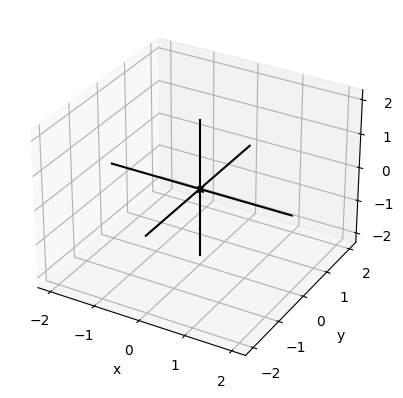

In [13]:
Draw3DOperation()

## Multi Section

In [14]:
pointList = [(1,1,1),(1,-1,-1)]

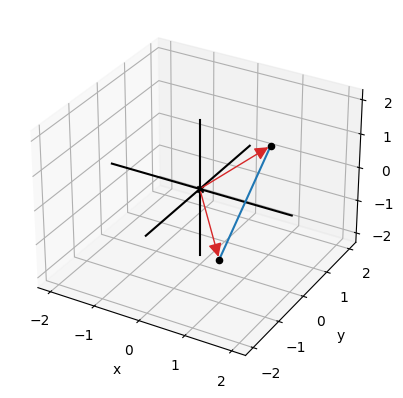

In [15]:
Draw3DOperation(
    Points3D(*pointList),
    Arrow3D(pointList[0]),
    Arrow3D(pointList[1]),
    Segment3D(*pointList)
)

## Points

In [16]:
pointList = [(2,2,2),(1,-2,-2)]

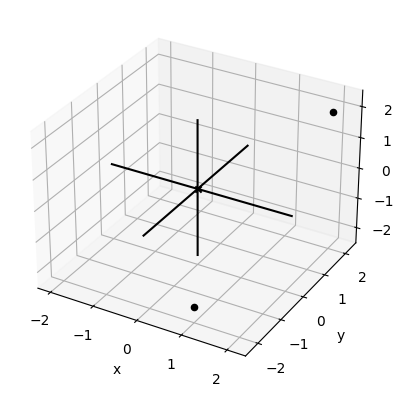

In [17]:
Draw3DOperation(
    Points3D(*pointList)
)

## Box

In [18]:
pointList = [(2,2,2),(1,-2,-2)]

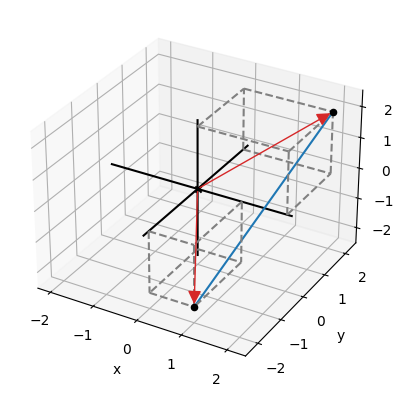

In [19]:
Draw3DOperation(
    Points3D(*pointList),
    Arrow3D(pointList[0]),
    Arrow3D(pointList[1]),
    Segment3D(*pointList),
    Box3D(pointList[0][0],pointList[0][1],pointList[0][2]),
    Box3D(pointList[1][0],pointList[1][1],pointList[1][2])
)

In [20]:
vectorPoints = (-1,-2,6)

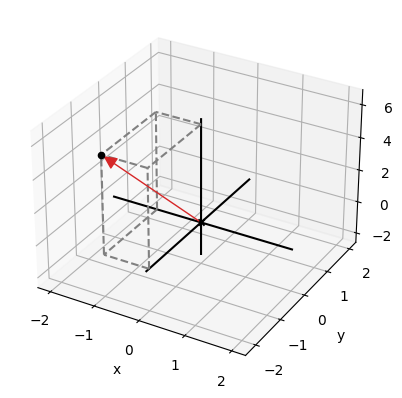

In [21]:
Draw3DOperation(
    Points3D(vectorPoints),
    Arrow3D(vectorPoints),
    Box3D(*vectorPoints)
)

# Applications

## Vector Addition

In [22]:
def VectorAddition3D(*vectors:tuple)->OPERATIONS:
  coordinates = zip(*vectors)
  sums = [sum(coor) for coor in coordinates]
  return tuple(sums)

In [23]:
vectorsList = list(zip(*[(1,1,3),(2,4,-4),(4,2,2)]))
print(f"Vectors:\n{vectorsList}")

Vectors:
[(1, 2, 4), (1, 4, 2), (3, -4, 2)]


In [24]:
vectorAddition = VectorAddition3D(*vectorsList)
print(f"Vector Addition:\n{vectorAddition}")

Vector Addition:
(5, 2, 8)


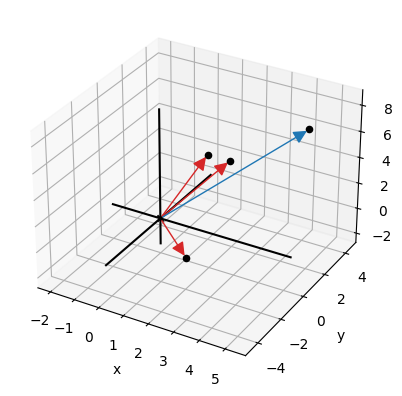

In [25]:
Draw3DOperation(
    Points3D(*vectorsList),
    Arrow3D(vectorsList[0]),
    Arrow3D(vectorsList[1]),
    Arrow3D(vectorsList[2]),
    Points3D(vectorAddition),
    Arrow3D(vectorAddition,color=COLORS.BLUE)
)

In [26]:
def MagnitudeCalculation(vectors:list or tuple)->OPERATIONS:
  return sqrt(sum([coor**2 for coor in vectors]))

In [27]:
magnitudeVector = MagnitudeCalculation(vectorAddition)
print(f"Magnitude: {magnitudeVector}")

Magnitude: 9.643650760992955


In [28]:
def PlotVectorsAddition(axs:CLASSINIT,vector:tuple or list,origin:list=[0,0,0],**options)->OPERATIONS:
  return axs.quiver(*origin,*vector,**options)

In [29]:
vector1 = np.array([1,2,4])
vector2 = np.array([1,4,2])
vector3 = np.array([3,-4,2])
sumVector = vector1+vector2+vector3
print(f"Sum of Vector: {sumVector}")

Sum of Vector: [5 2 8]


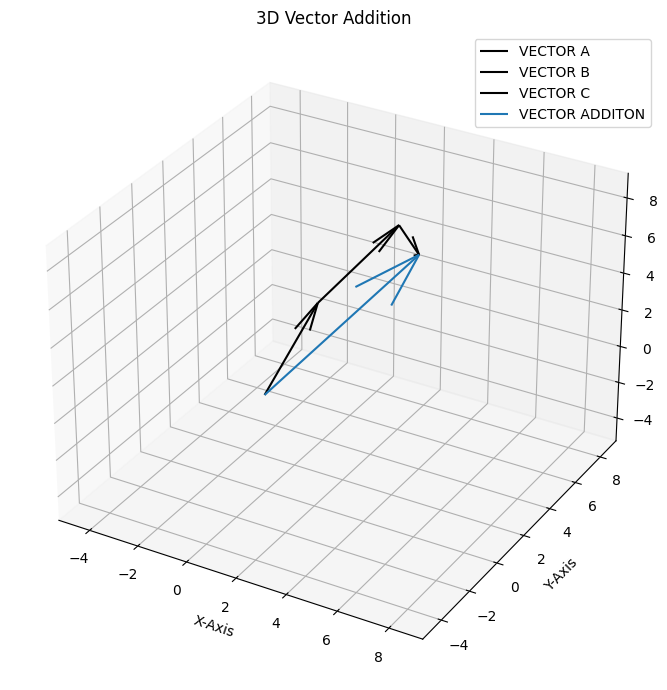

In [30]:
figure = plt.figure(figsize=(7,7))
ax = figure.add_subplot(111,projection="3d")
PlotVectorsAddition(axs=ax,vector=vectorsList[0],color=COLORS.BLACK,label="VECTOR A")
PlotVectorsAddition(axs=ax,vector=vectorsList[1],origin=vectorsList[0],color=COLORS.BLACK,label="VECTOR B")
PlotVectorsAddition(axs=ax,vector=vectorsList[2],origin=VectorAddition3D(*vectorsList[:2]),color=COLORS.BLACK,label="VECTOR C")
PlotVectorsAddition(axs=ax,vector=vectorAddition,color=COLORS.BLUE,label="VECTOR ADDITON")
maxLimit = np.max([vector1,vector2,vector3,sumVector])+1
minLimit = np.min([vector1,vector2,vector3,sumVector])-1
ax.set_xlabel("X-Axis")
ax.set_xlim([minLimit,maxLimit])
ax.set_ylim([minLimit,maxLimit])
ax.set_zlim([minLimit,maxLimit])
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
ax.set_title("3D Vector Addition")
ax.legend()
plt.tight_layout()
plt.show()

## Dot (Scalar) Product

**The dot product of two vectors is a scalar value that is the product of the magnitudes of the two vectors and the cosine of the angle between them**:

> $\mathbf{A} \cdot \mathbf{B} = |\mathbf{A}| |\mathbf{B}| \cos(\theta)$


**The angle $Q$ between two vectors A and B can be calculated using their dot product and magnitudes**:

> $\cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{A}| |\mathbf{B}|}$

> $\theta = \cos^{-1}\left( \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{A}| |\mathbf{B}|} \right)$


In [31]:
def DotProduct(vectorA:tuple or list,vectorB:tuple or list)->OPERATIONS:
  return sum(a*b for a,b in zip(vectorA,vectorB))

In [32]:
def MagnitudeCalculation(vector:tuple or list)->OPERATIONS:
  return sqrt(sum(x**2 for x in vector))

In [33]:
def AngleBetweenVectors(vectorA:tuple or list,vectorB:tuple or list)->OPERATIONS:
  dotProduct = DotProduct(vectorA,vectorB)
  magnitudeA = MagnitudeCalculation(vectorA)
  magnitudeB = MagnitudeCalculation(vectorB)
  angleRadian = acos(dotProduct/(magnitudeA*magnitudeB))
  angleDegree = degrees(angleRadian)
  return angleDegree

In [34]:
vectorA = [1,0,0] # X-axis unit vector
vectorB = [0,1,0] # Y-axis unit vector
angleBetweenVectors = AngleBetweenVectors(vectorA,vectorB)
print(f"Angle: {angleBetweenVectors}")

Angle: 90.0


In [35]:
vectorA = (0,3,0)
vectorB = (0,0,-5)
dotProduct = DotProduct(vectorA,vectorB)
print(f"Dot Product: {dotProduct}")

Dot Product: 0


## Cross (Vector) Product

**The cross product of two vectors results in a third vector that is perpendicular to both of the original vectors. It is significant in physics, particularly in torque and rotational dynamics calculations**:

> $\mathbf{A} \times \mathbf{B} = |\mathbf{A}| |\mathbf{B}| \sin(\theta) \, \mathbf{n}$ , where `n` is the unit vector perpendicular to both A and B.

**The sine of the angle $θ$ between vectors A and B can be found using the formula**:

> $\sin(\theta) = \frac{|\mathbf{A} \times \mathbf{B}|}{|\mathbf{A}| |\mathbf{B}|}$




In [36]:
def VectorProduct(vectorA:tuple or list,vectorB:tuple or list)->OPERATIONS:
  x = vectorA[1]*vectorB[2] - vectorA[2]*vectorB[1]
  y = vectorA[2]*vectorB[0] - vectorA[0]*vectorB[2]
  z = vectorA[0]*vectorB[1] - vectorA[1]*vectorB[0]
  return (x,y,z)

In [37]:
def VectorProductOtherFunction(vectorA:tuple or list,vectorB:tuple or list)->OPERATIONS:
  ux,uy,uz = vectorA
  vx,vy,vz = vectorB
  return (uy*vz-uz*vy,uz*vx-ux*vz,ux*vy-uy*vx)

In [38]:
vectorA = (0,0,1)
vectorB = (1,2,3)

In [39]:
vectorProductOne = VectorProduct(vectorA,vectorB)
vectorProductTwo = VectorProductOtherFunction(vectorA,vectorB)
print(f"Vector Product: {vectorProductOne}")
print(f"Vector Product: {vectorProductTwo}")

Vector Product: (-2, 1, 0)
Vector Product: (-2, 1, 0)


In [40]:
def SinAngleBetweenVectors(vectorA:tuple or list,vectorB:tuple or list)->OPERATIONS:
  crossProduct = VectorProduct(vectorA,vectorB)
  magnitudeCrossProduct = MagnitudeCalculation(crossProduct)
  magnitudeA = MagnitudeCalculation(vectorA)
  magnitudeB = MagnitudeCalculation(vectorB)
  sin = magnitudeCrossProduct/(magnitudeA*magnitudeB)
  return sin

In [41]:
sinAngle = SinAngleBetweenVectors(vectorA,vectorB)
print(f"Sin Angle: {sinAngle}")

Sin Angle: 0.5976143046671969


## Example Questions

**The displacement vector $D_{AB}$ is the vector sum of the jogger’s displacement vector $D_{AT}$ along the stairs (from point A at the bottom of the stairs to point T at the top of the stairs) and his displacement vector $D_{TB}$ on the top of the hill (from point A at the top of the stairs to the fountain at point T). We must find the horizontal and the vertical components of $D_{AT}$. If each step has width w and height h, the horizontal component of $D_{AT}$ must have a length of 200w and the vertical component must have a length of 200h. The actual distance the jogger covers is the sum of the distance he runs up the stairs and the distance of 50.0 m that he runs along the top of the hill**.

In [42]:
def DisplacementVector(w:int or float,h:int or float)->PROCESS:
  horizontalComponent = 200*w
  verticalComponent = 200*h
  # Displacement vector D_AT
  D_AT = (horizontalComponent,verticalComponent)
  # Total displacement including D_TB (50.0 m horizontally)
  D_TB = 50.0 # Displacement along the top of the hill
  totalDisplacement = (D_AT[0]+D_TB,D_AT[1])
  return D_AT,totalDisplacement

In [43]:
width = 0.2 # Width of each step in meters
height = 0.1 # Height of each step in meters

In [44]:
D_AT,totalDisplacement = DisplacementVector(width,height)
print(f"Displacement Vector D_AT: {D_AT}\nTotal Displacement: {totalDisplacement}")

Displacement Vector D_AT: (40.0, 20.0)
Total Displacement: (90.0, 20.0)


**Magnitude of the Displacement Vector**:

> $d_{AT} = \sqrt{D_{AT_x}^2 + D_{AT_y}^2}$

**Total Distance Covered $D_{total}$**:

> $D_{total} = d_{AT} + D_{TB}$

In [45]:
magnitudeDisplacementVector = sqrt(D_AT[0]**2+D_AT[1]**2)
D_TB = 50
totalDistance = magnitudeDisplacementVector+D_TB
print(f"Actual Distance: {round(totalDistance,3)} m" )

Actual Distance: 94.721 m


**If the velocity vector of the military convoy is $v=(4.0i+3.0j+0.1k)$ km/h, what is the unit vector of its direction of motion?**

The magnitude of a vector is given by the square root of the sum of the squares of its components:

> $|\mathbf{v}| = \sqrt{v_x^2 + v_y^2 + v_z^2}$

The unit vector u in the direction of v is obtained by dividing each component of v by its magnitude:

> $\mathbf{u} = \left( \frac{v_x}{|\mathbf{v}|}, \frac{v_y}{|\mathbf{v}|}, \frac{v_z}{|\mathbf{v}|} \right)$



In [50]:
def FindUnitVector(vector:list or tuple)->OPERATIONS:
  magnitude = sqrt(sum(x**2 for x in vector))
  return [round(x/magnitude,3) for x in vector]

In [51]:
vector = [4.0,3.0,0.1]

In [52]:
unitVector = FindUnitVector(vector)
print(f"Unit Vector: {unitVector}")

Unit Vector: [0.8, 0.6, 0.02]


**Three dogs are pulling on a stick in different directions. The first dog pulls with force $F_{1}=(10.0i-20.4j+2.0k)N$, the second dog pulls with force $F_{2}=(-15.0i-6.0k)N$, and the third dog pulls with force $F_{3}=(5.0i+12.5j)N$. What is the angle between forces $F_{1}$ and $F_{2}$? If the stick moves momentarily and gets displaced by vector $D=(-7.9j-4.2k)cm$ how much work is done by the third dog?**

In [53]:
def DotProduct(vectorA:tuple or list,vectorB:tuple or list)->OPERATIONS:
  return sum(a_i*b_i for a_i,b_i in zip(vectorA,vectorB))

In [54]:
def MagnitudeCalculation(vector:tuple or list)->OPERATIONS:
  return sqrt(sum(x**2 for x in vector))

In [58]:
def AngleBetweenVectors(vectorA:tuple or list,vectorB:tuple or list)->OPERATIONS:
  dotProduct = DotProduct(vectorA,vectorB)
  magnitudeA = MagnitudeCalculation(vectorA)
  magnitudeB = MagnitudeCalculation(vectorB)
  angleRadians = acos(dotProduct/(magnitudeA*magnitudeB))
  return degrees(angleRadians)

In [59]:
F1 = [10,-20.4,2.0]
F2 = [-15,0,-6]

The angle $Q$ between two vectors A and B can be calculated using their dot product and magnitudes:

> $\cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{A}| |\mathbf{B}|}$

> $\theta = \cos^{-1}\left( \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{A}| |\mathbf{B}|} \right)$

In [62]:
angle = AngleBetweenVectors(F1,F2)
print(f"Angle Between F1 & F2: {round(angle,3)}")

Angle Between F1 & F2: 116.083


In [63]:
def WorkDone(forceVector:tuple or list,displacementVector:tuple or list)->OPERATIONS:
  return DotProduct(forceVector,displacementVector)

In [64]:
F3 = [5.0,12.5,0.0]
D = [0.0,-7.9,-4.2]

$WORK = F.D$

In [67]:
workF3 = WorkDone(F3,D)
print(f"Work Done: {workF3} N.cm")

Work Done: -98.75 N.cm


**In a tug-of-war game on one campus, 15 students pull on a rope at both ends in an effort to displace the central knot to one side or the other. Two students pull with force 196 N each to the right, four students pull with force 98 N each to the left, five students pull with force 62 N each to the left, three students pull with force 150 N each to the right, and one student pulls with force 250 N to the left. Assuming the positive direction to the right, express the net pull on the knot in terms of the unit vector. How big is the net pull on the knot? In what direction?**

In [68]:
rightForce = [(2,196),(3,150)] # (number of students, force in N)
leftForce = [(4,98),(5,62),(1,250)] # (number of students, force in N)

In [69]:
totalRightForce = sum(students*force for students,force in rightForce)
totalLeftForce = sum(students*force for students,force in leftForce)

In [70]:
netForce = totalRightForce-totalLeftForce
print(f"Net Force: {netForce}")

Net Force: -110


In [72]:
print(f"Magnitude of Force: {abs(netForce)}")

Magnitude of Force: 110


In [71]:
direction = "right" if netForce > 0 else "left"
print(f"Force Direction: {direction}")

Force Direction: left
